Let's plot up the kinamtic motion times

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_scheduler.scheduler.model_observatory import KinemModel

In [2]:
all_curves = {}

km = KinemModel()

In [3]:

# Set Telescope to extra fast
km.setup_telescope(altitude_maxspeed=1e6, altitude_accel=1e6, altitude_jerk=None, 
                  azimuth_maxspeed=1e6, azimuth_accel=1e6, azimuth_jerk=None, settle_time=0,
                  altitude_minpos=0.0, altitude_maxpos=90.5)


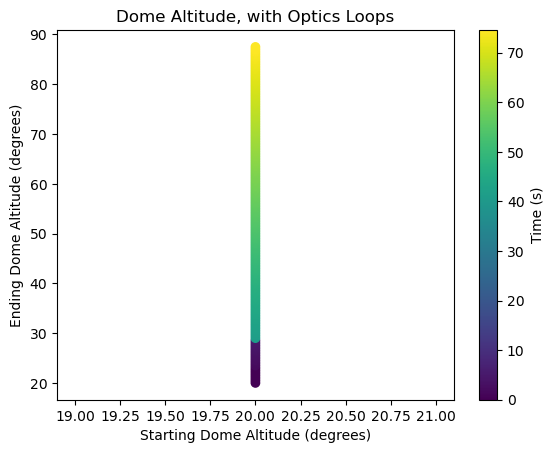

In [4]:
start_alts = np.radians(np.arange(20,88, .5))

start_end_time = []
for start_alt in [start_alts[0]]:
    for end_alt in start_alts:
        st = km.slew_times(
        0.,
        0.,
        65000,
        rot_sky_pos=None,
        rot_tel_pos=None,
        bandname="r",
        lax_dome=True,
        alt_rad=np.array([end_alt]),
        az_rad=np.array([0.]),
        starting_alt_rad=np.array([start_alt]),
        starting_az_rad=np.array([0.]),
        starting_rot_tel_pos_rad=None,
        update_tracking=False)

        start_end_time.append([start_alt, end_alt, np.max(st)])

ack = np.array(start_end_time)
fig, ax = plt.subplots()
scat = ax.scatter(np.degrees(ack[:,0]), np.degrees(ack[:,1]), c=ack[:,2], label='Time (s)')
ax.set_xlabel('Starting Dome Altitude (degrees)')
ax.set_ylabel('Ending Dome Altitude (degrees)')
ax.set_title("Dome Altitude, with Optics Loops")
cb = fig.colorbar(scat)
cb.set_label('Time (s)')

#fig.savefig("domealt_opt.pdf")

all_curves['Dome Altitude (with optics loop)'] = ack

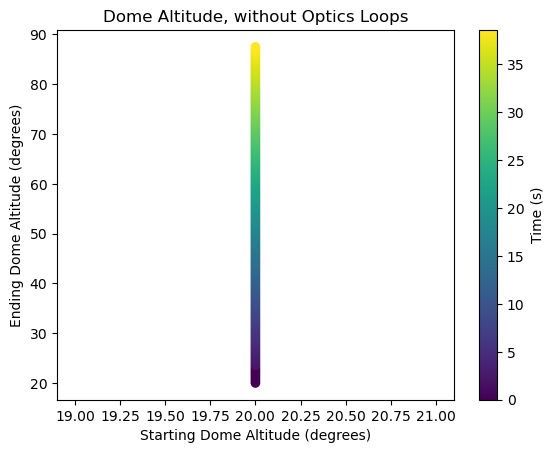

In [5]:
# Now with no optics
km.setup_optics(cl_delay=[0.0, 0.0],ol_slope=1e6)

start_end_time = []
for start_alt in [start_alts[0]]:
    for end_alt in start_alts:
        st = km.slew_times(
        0.,
        0.,
        65000,
        rot_sky_pos=None,
        rot_tel_pos=None,
        bandname="r",
        lax_dome=True,
        alt_rad=np.array([end_alt]),
        az_rad=np.array([0.]),
        starting_alt_rad=np.array([start_alt]),
        starting_az_rad=np.array([0.]),
        starting_rot_tel_pos_rad=None,
        update_tracking=False)

        start_end_time.append([start_alt, end_alt, np.max(st)])

ack = np.array(start_end_time)
fig, ax = plt.subplots()
scat = ax.scatter(np.degrees(ack[:,0]), np.degrees(ack[:,1]), c=ack[:,2], label='Time (s)')
ax.set_xlabel('Starting Dome Altitude (degrees)')
ax.set_ylabel('Ending Dome Altitude (degrees)')
ax.set_title("Dome Altitude, without Optics Loops")
cb = fig.colorbar(scat)
cb.set_label('Time (s)')

#fig.savefig("domealt_noopt.pdf")
all_curves['Dome Altitude (without optics loop)'] = ack

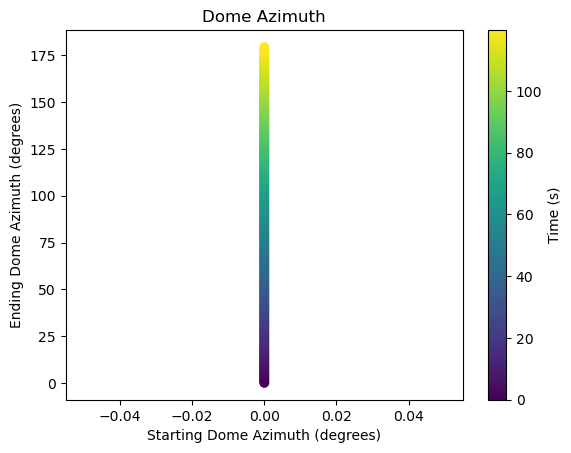

In [6]:
az = np.radians(np.arange(0, 180, .5))

start_end_time = []
for start_az in [0]:
    for end_az in az:
        st = km.slew_times(
        0.,
        0.,
        65000,
        rot_sky_pos=None,
        rot_tel_pos=None,
        bandname="r",
        lax_dome=True,
        alt_rad=np.array([np.pi/4]),
        az_rad=np.array([end_az]),
        starting_alt_rad=np.array([np.pi/4]),
        starting_az_rad=np.array([start_az]),
        starting_rot_tel_pos_rad=None,
        update_tracking=False)

        start_end_time.append([start_az, end_az, np.max(st)])

ack = np.array(start_end_time)
fig, ax = plt.subplots()
scat = ax.scatter(np.degrees(ack[:,0]), np.degrees(ack[:,1]), c=ack[:,2], label='Time (s)')
ax.set_xlabel('Starting Dome Azimuth (degrees)')
ax.set_ylabel('Ending Dome Azimuth (degrees)')
ax.set_title("Dome Azimuth")
cb = fig.colorbar(scat)
cb.set_label('Time (s)')

#fig.savefig("domeaz.pdf")
all_curves['Dome Azimuth'] = ack

In [7]:
km = KinemModel()
# set Dome to extra fast
km.setup_dome(altitude_maxspeed=1e6, altitude_accel=1e6, azimuth_maxspeed=1e6, azimuth_accel=1e6, settle_time=0)

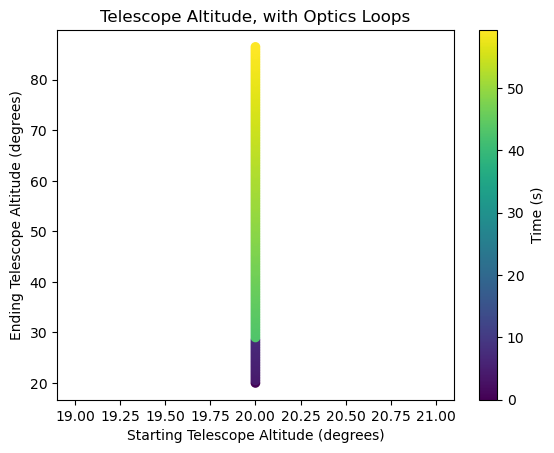

In [8]:
start_alts = np.radians(np.arange(20,88, .5))

start_end_time = []
for start_alt in [start_alts[0]]:
    for end_alt in start_alts:
        st = km.slew_times(
        0.,
        0.,
        65000,
        rot_sky_pos=None,
        rot_tel_pos=None,
        bandname="r",
        lax_dome=True,
        alt_rad=np.array([end_alt]),
        az_rad=np.array([0.]),
        starting_alt_rad=np.array([start_alt]),
        starting_az_rad=np.array([0.]),
        starting_rot_tel_pos_rad=None,
        update_tracking=False)

        start_end_time.append([start_alt, end_alt, np.max(st)])

ack = np.array(start_end_time)
fig, ax = plt.subplots()
scat = ax.scatter(np.degrees(ack[:,0]), np.degrees(ack[:,1]), c=ack[:,2], label='Time (s)')
ax.set_xlabel('Starting Telescope Altitude (degrees)')
ax.set_ylabel('Ending Telescope Altitude (degrees)')
ax.set_title("Telescope Altitude, with Optics Loops")
cb = fig.colorbar(scat)
cb.set_label('Time (s)')

#fig.savefig("telalt_opt.pdf")
all_curves['Telescope Altitude (with optics loop)'] = ack

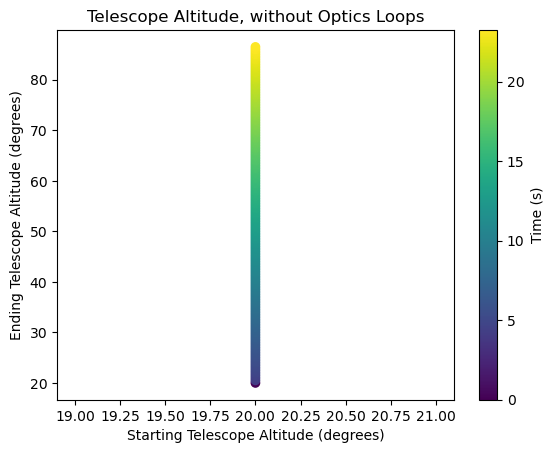

In [9]:
# Now with no optics
km.setup_optics(cl_delay=[0.0, 0.0],ol_slope=1e6)
start_end_time = []
for start_alt in [start_alts[0]]:
    for end_alt in start_alts:
        st = km.slew_times(
        0.,
        0.,
        65000,
        rot_sky_pos=None,
        rot_tel_pos=None,
        bandname="r",
        lax_dome=True,
        alt_rad=np.array([end_alt]),
        az_rad=np.array([0.]),
        starting_alt_rad=np.array([start_alt]),
        starting_az_rad=np.array([0.]),
        starting_rot_tel_pos_rad=None,
        update_tracking=False)

        start_end_time.append([start_alt, end_alt, np.max(st)])

ack = np.array(start_end_time)
fig, ax = plt.subplots()
scat = ax.scatter(np.degrees(ack[:,0]), np.degrees(ack[:,1]), c=ack[:,2], label='Time (s)')
ax.set_xlabel('Starting Telescope Altitude (degrees)')
ax.set_ylabel('Ending Telescope Altitude (degrees)')
ax.set_title("Telescope Altitude, without Optics Loops")
cb = fig.colorbar(scat)
cb.set_label('Time (s)')
#fig.savefig("telalt_noopt.pdf")
all_curves['Telescope Altitude (without optics loop)'] = ack

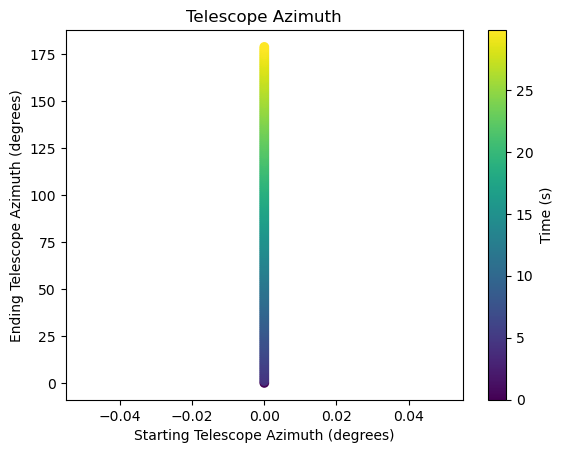

In [10]:
az = np.radians(np.arange(0, 180, 1))

start_end_time = []
for start_az in [az[0]]:
    for end_az in az:
        st = km.slew_times(
        0.,
        0.,
        65000,
        rot_sky_pos=None,
        rot_tel_pos=None,
        bandname="r",
        lax_dome=True,
        alt_rad=np.array([np.pi/4]),
        az_rad=np.array([end_az]),
        starting_alt_rad=np.array([np.pi/4]),
        starting_az_rad=np.array([start_az]),
        starting_rot_tel_pos_rad=None,
        update_tracking=False)

        start_end_time.append([start_az, end_az, np.max(st)])

ack = np.array(start_end_time)
fig, ax = plt.subplots()
scat = ax.scatter(np.degrees(ack[:,0]), np.degrees(ack[:,1]), c=ack[:,2], label='Time (s)')
ax.set_xlabel('Starting Telescope Azimuth (degrees)')
ax.set_ylabel('Ending Telescope Azimuth (degrees)')
ax.set_title("Telescope Azimuth")
cb = fig.colorbar(scat)
cb.set_label('Time (s)')

#fig.savefig("telaz.pdf")
all_curves['Telescope Azimuth'] = ack

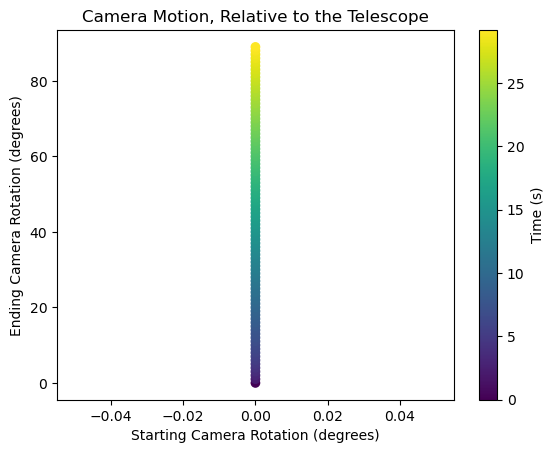

In [11]:
rots = np.radians(np.arange(0, 90, 1))

start_end_time = []
for start_az in [rots[0]]:
    for end_az in rots:
        st = km.slew_times(
        0.,
        0.,
        65000,
        rot_sky_pos=None,
        rot_tel_pos=np.array([end_az]),
        bandname=np.array(["r"]),
        lax_dome=True,
        alt_rad=np.array([np.pi/4]),
        az_rad=np.array([0.]),
        starting_alt_rad=np.array([np.pi/4]),
        starting_az_rad=np.array([0.]),
        starting_rot_tel_pos_rad=np.array([start_az]),
        update_tracking=False)

        start_end_time.append([start_az, end_az, np.max(st)])

ack = np.array(start_end_time)
fig, ax = plt.subplots()
scat = ax.scatter(np.degrees(ack[:,0]), np.degrees(ack[:,1]), c=ack[:,2], label='Time (s)')
ax.set_xlabel('Starting Camera Rotation (degrees)')
ax.set_ylabel('Ending Camera Rotation (degrees)')
ax.set_title("Camera Motion, Relative to the Telescope")
cb = fig.colorbar(scat)
cb.set_label('Time (s)')

#fig.savefig("camera_motion.pdf")
all_curves['Camera Rotator'] = ack

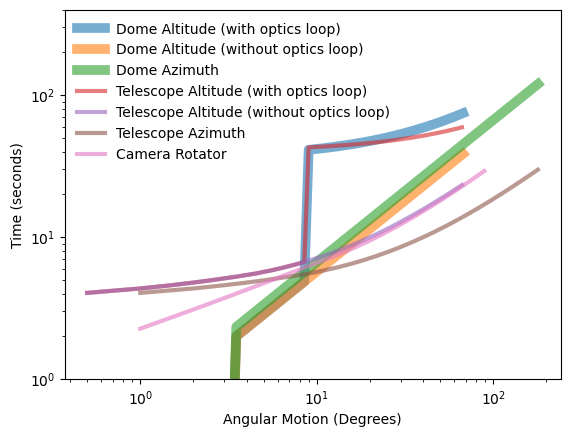

In [12]:
fig, ax = plt.subplots()
for key in all_curves:
    xval = np.degrees(all_curves[key][:, 1] - all_curves[key][:, 0])
    good = np.where(xval > 0)[0]
    if "Dome" in key:
        linewidth = 7
    else:
        linewidth = 3
    ax.loglog(xval[good], all_curves[key][good, 2], label=key, alpha=0.6, linewidth=linewidth)

ax.set_xlabel('Angular Motion (Degrees)')
ax.set_ylabel('Time (seconds)')
ax.set_ylim([1,400])
leg = ax.legend(frameon=False)

fig.savefig("motion_times.pdf")